## Variables globales para la red neuronal

In [1]:
EPOCHS = 1000
LR = 0.001

""" Elegir una """
#ACTIVATION_OUTPUT = 'softmax'
ACTIVATION_OUTPUT = 'sigmoid'

## 1. Preprocesamiento de Datos

Convertiremos las etiquetas a formato One-Hot Encoding y normalizaremos las características.

In [2]:
from DatasetLoader import DatasetLoader

dataset_loader = DatasetLoader(dataset_name="iris", validation_split=0.2)
X_train, X_val, X_test, y_train, y_val, y_test = dataset_loader.load_data()


## 2. Definición de la Arquitectura de la Red Neuronal

Aquí definimos una clase NeuralNetwork para implementar una red neuronal básica.

In [3]:
from NeuralNetwork import NeuralNetwork


nn = NeuralNetwork(
    layers=[4, 10, 8, 3],  # Ejemplo: 4 entradas, dos capas ocultas (10 y 8 neuronas), 3 salidas
    learning_rate=LR,
    activation_hidden="relu"
)

## 3. Entrenamiento de la Red Neuronal

Entrenamos la red y almacenamos la pérdida en cada época para graficarla después.

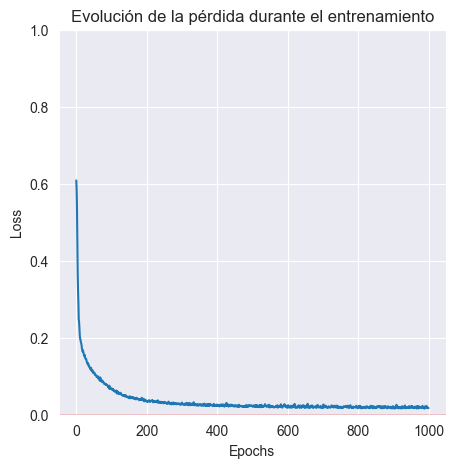

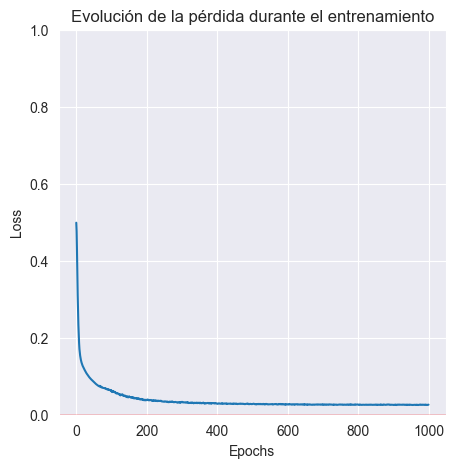

In [4]:
from Trainer import Trainer

BATCH_SIZE = 32
trainer = Trainer(nn, X_train, y_train, X_val, y_val, X_test, y_test, batch_size=BATCH_SIZE)


losses, val_losses = trainer.train(epochs=EPOCHS)
trainer.plot_losses(losses)
trainer.plot_losses(val_losses)


## 4. Evaluación y Visualización de Resultados

Evaluamos el modelo en los datos de prueba y visualizamos los resultados.

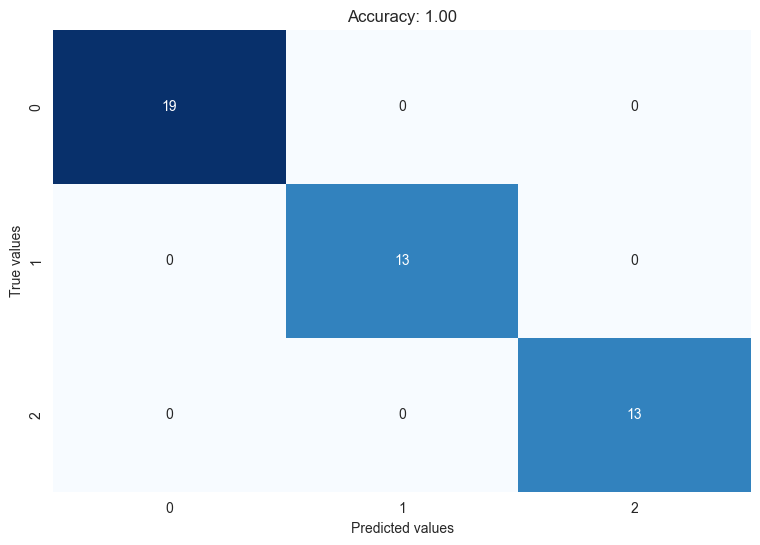

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix, accuracy = trainer.evaluate()

plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title(f'Accuracy: {accuracy:.2f}')
plt.show()

demekdm

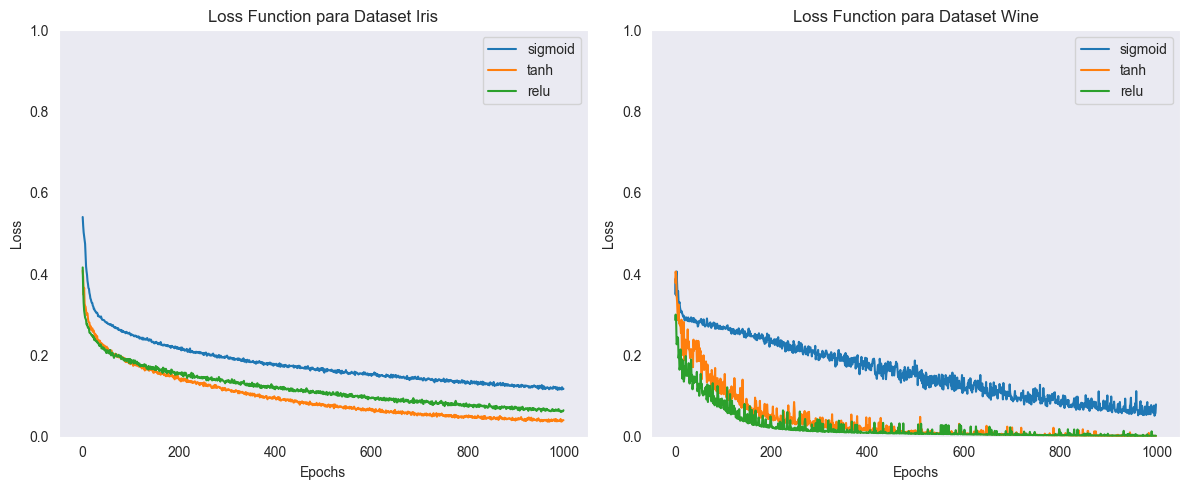

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definimos los datasets y funciones de activación
datasets = ["iris", "wine"]
activations = ["sigmoid", "tanh", "relu"]

# Inicializamos diccionarios para almacenar pérdidas, precisiones y matrices de confusión
losses_dict = {dataset: {activation: [] for activation in activations} for dataset in datasets}
accuracy_dict = {dataset: {activation: 0 for activation in activations} for dataset in datasets}
conf_matrix_dict = {dataset: {activation: None for activation in activations} for dataset in datasets}

for dataset in datasets:
    for activation in activations:
        dataset_loader = DatasetLoader(dataset_name=dataset)
        X_train, X_val, X_test, y_train, y_val, y_test = dataset_loader.load_data()
        
        # Establecemos el tamaño de entrada y salida basado en el dataset
        if dataset_loader.dataset_name == "iris":
            layers = [4, 10, 3]  # 4 entradas, 1 capa oculta con 10 neuronas, 3 salidas
        elif dataset_loader.dataset_name == "wine":
            layers = [13, 12, 8, 3]  # 13 entradas, 2 capas ocultas con 12 y 8 neuronas, 3 salidas
        
        # Creamos la red neuronal con estructura dinámica
        nn = NeuralNetwork(
            layers=layers,
            learning_rate=LR,
            activation_hidden=activation  # Activación para capas ocultas
        )
        
        # Creamos el entrenador y entrenamos
        trainer = Trainer(nn, X_train, y_train, X_val, y_val, X_test, y_test, batch_size=BATCH_SIZE)
        losses, val_losses = trainer.train(epochs=EPOCHS)
        
        # Almacenamos las pérdidas en el diccionario
        losses_dict[dataset][activation] = losses
        
        # Evaluamos el modelo
        conf_matrix, accuracy = trainer.evaluate()
        accuracy_dict[dataset][activation] = accuracy  # Guardamos la precisión
        conf_matrix_dict[dataset][activation] = conf_matrix  # Guardamos la matriz de confusión

# Creamos las gráficas de pérdidas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Graficamos para el dataset Iris
for activation in activations:
    axs[0].plot(losses_dict["iris"][activation], label=activation)
axs[0].set_title("Loss Function para Dataset Iris")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_ylim(0, 1)
axs[0].legend()
axs[0].grid()

# Graficamos para el dataset Wine
for activation in activations:
    axs[1].plot(losses_dict["wine"][activation], label=activation)
axs[1].set_title("Loss Function para Dataset Wine")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Loss")
axs[1].set_ylim(0, 1)
axs[1].legend()
axs[1].grid()

# Mostramos las gráficas de pérdidas
plt.tight_layout()
plt.show()


## Crear un mapa de calor para las precisiones

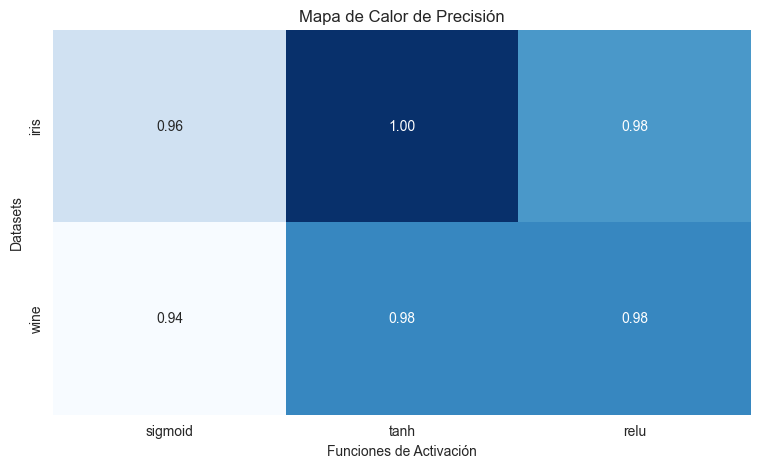

In [8]:
accuracy_matrix = np.array([[accuracy_dict[dataset][activation] for activation in activations] for dataset in datasets])

plt.figure(figsize=(9, 5))
sns.heatmap(accuracy_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=activations, yticklabels=datasets, cbar=False)
plt.title("Mapa de Calor de Precisión")
plt.xlabel("Funciones de Activación")
plt.ylabel("Datasets")
plt.show()

## Graficar todas las matrices de confusión

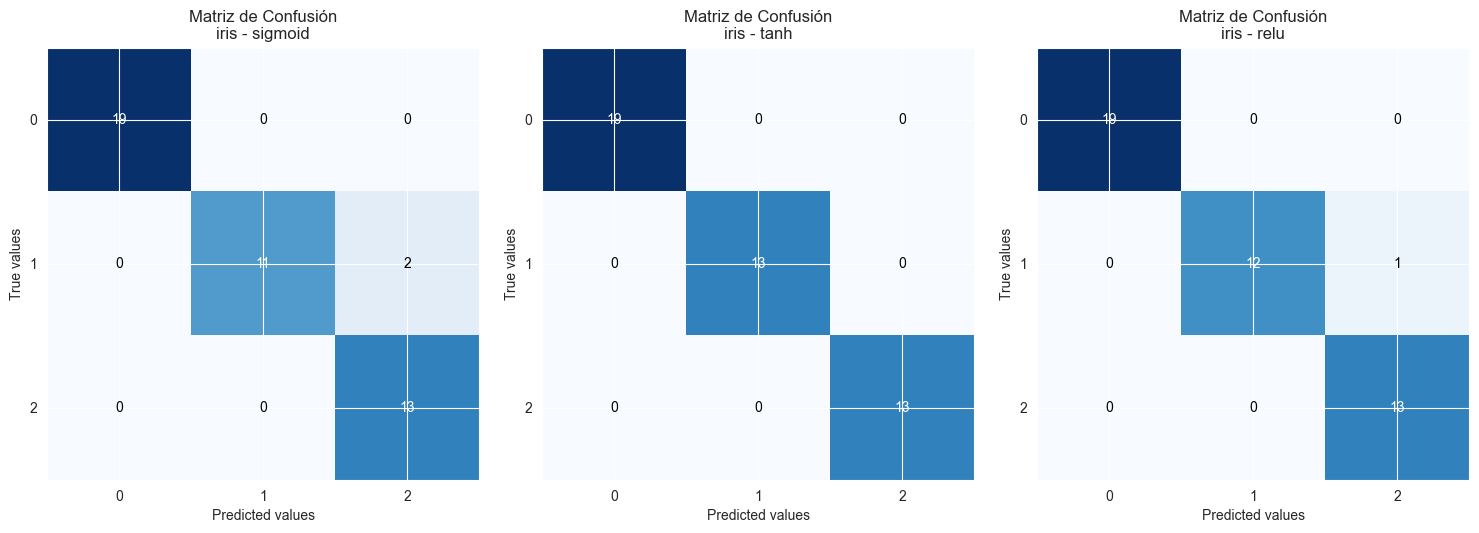

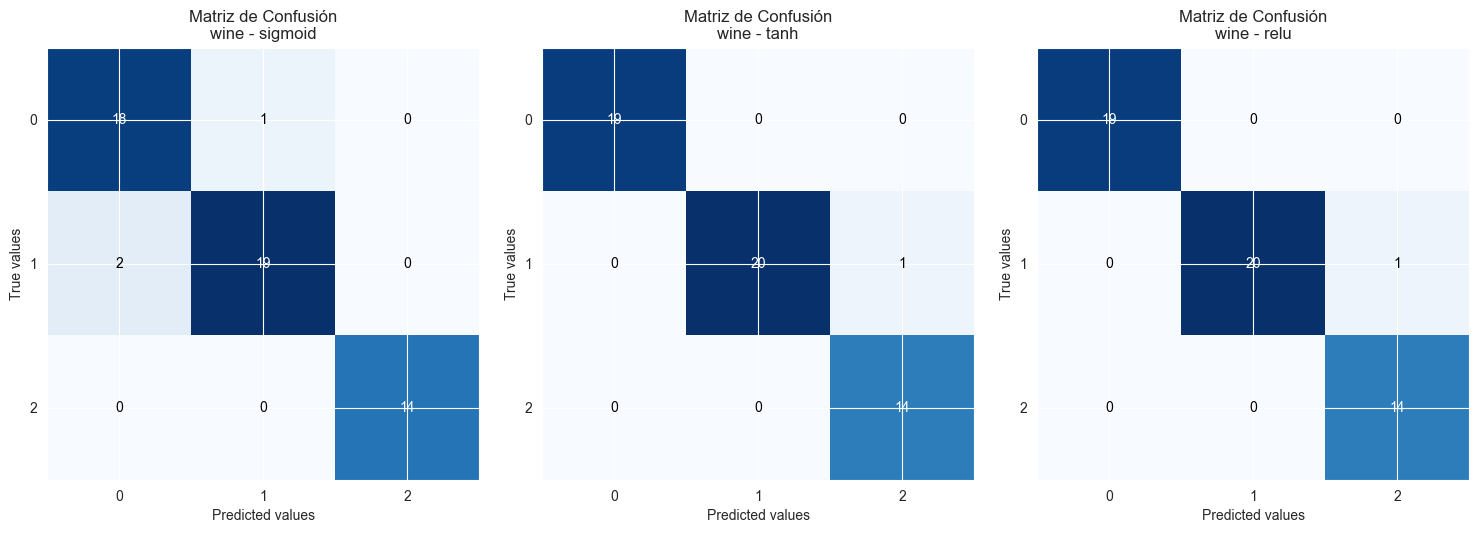

In [9]:
for dataset in datasets:
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for i, activation in enumerate(activations):
        axs[i].imshow(conf_matrix_dict[dataset][activation], interpolation='nearest', cmap=plt.cm.Blues)
        axs[i].set_title(f"Matriz de Confusión\n{dataset} - {activation}")
        axs[i].set_xlabel("Predicted values")
        axs[i].set_ylabel("True values")
        # Añadir etiquetas a los ejes
        ticks = np.arange(len(conf_matrix_dict[dataset][activation]))
        axs[i].set_xticks(ticks)
        axs[i].set_yticks(ticks)
        axs[i].set_xticklabels(ticks)
        axs[i].set_yticklabels(ticks)
        
        # Añadir anotaciones
        for j in range(conf_matrix_dict[dataset][activation].shape[0]):
            for k in range(conf_matrix_dict[dataset][activation].shape[1]):
                axs[i].text(k, j, format(conf_matrix_dict[dataset][activation][j, k], 'd'),
                             ha="center", va="center", color="white" if conf_matrix_dict[dataset][activation][j, k] > conf_matrix_dict[dataset][activation].max() / 2 else "black")
    plt.tight_layout()
    plt.show()